## Machine Learning Abductive Loop

### Goals of this Procedure
1. Instantiate linear model.
2. Attempt to update parameters.
3. Recommend new experiments to run...

In [1]:
import numpy as np

from scipy.stats import invgamma, norm, multivariate_normal
from matplotlib import pyplot as plt
%matplotlib inline

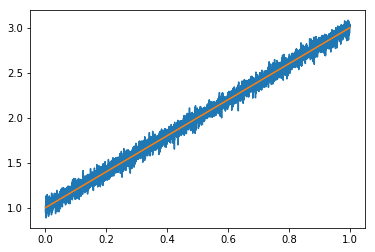

In [14]:
B = np.array([[2.,1.]]).T                  # Contrived
x = np.array([np.linspace(0,1,5000)]).T    # Inputs from data
x = np.c_[x,np.ones([len(x),1])]
y = np.matrix(norm.rvs(np.dot(x,B),.05))    # Outputs from data

plt.plot(x[:,0],y)
plt.plot(x[:,0],np.dot(x,B))

In [15]:
n = float(len(y)) ## import from data
p = float(x.shape[1])   ## import from data

inv = np.linalg.inv(np.dot(x.T,x)) 
P = np.dot(np.dot(x,inv),x.T)

a = (n-p)/2.
s2 = (1./(n-p))*np.dot(np.dot(y.T,np.eye(P.shape[0])-P), y)
scale = ((n-p) * s2 / 2.)

print s2
sigma2hat = invgamma.rvs(a,scale=scale,size=10000)
Bhat = np.dot(inv,np.dot(x.T,y))
print Bhat

[[ 0.00252337]]
[[ 1.99465387]
 [ 1.00263912]]


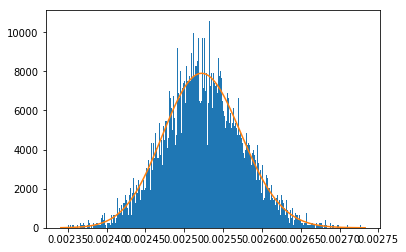

In [16]:
_ = plt.hist(sigma2hat,500,normed=True)
phi = np.linspace(sigma2hat.min(),sigma2hat.max(),100)
_ = plt.plot(phi,invgamma.pdf(phi,a,scale=scale).T)

In [17]:
bsamples = []

for sigma2 in sigma2hat:
    bhat = multivariate_normal.rvs(mean = np.ravel(Bhat), cov = np.dot(inv,sigma2))
    bsamples.append(bhat)
    
bsamples = np.array(bsamples)

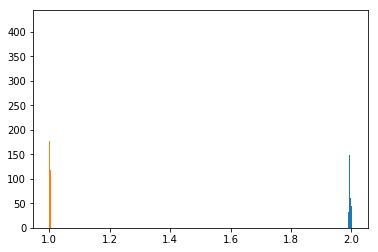

In [18]:
_ = plt.hist(bsamples[:,0], 1000, normed = True)
_ = plt.hist(bsamples[:,1], 1000, normed = True)

In [75]:
Y_hat = []
for b,s in zip(bsamples,sigma2hat):
    y_hat = norm.rvs(np.dot(x,b),s)
    Y_hat.append(y_hat)
Y_hat = np.array(Y_hat)

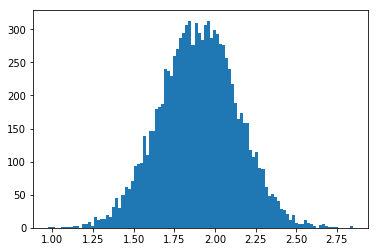

In [80]:
_ = plt.hist(Y_hat[:,450],100)